# Projeto de Previsão de Preços de Imóveis na Califórnia

**Autor:** Micarlo Teixeira
**Data:** 31 de julho de 2025

## 1. Introdução

O objetivo deste projeto é analisar o conjunto de dados de habitação da Califórnia e construir um modelo de *regressão* para prever o valor médio das casas (`median_house_value`) com base em outras características do bairro.

## 2. Análise Exploratória de Dados (EDA)

Nesta fase, vamos carregar, inspecionar e visualizar os dados para entender sua estrutura, identificar problemas como valores ausentes e descobrir padrões iniciais.

### 2.1. Importação de Bibliotecas e Carredamento dos Dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hashlib
import matplotlib.image as mpimgh

In [64]:
df_housing = pd.read_csv("/Users/micarloteixeira/Desktop/Data Science/projects/Housing_predict - LinearRegression/dataset/housing.csv")
df_housing.head() # Cada linha representra um bairro.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 2.2.1. Dicionário de Atributos e Inspeção Inicial

Abaixo está a descrição de cada atributo. Em seguida, usaremos os métodos `.info()`, `.describe()` e `.value_counts()` para uma primeira inspeção.

- **`longitude`**: Medida de quão a oeste uma casa está — valores mais altos indicam maior distância a oeste.

- **`latitude`**: Medida de quão ao norte uma casa está — valores mais altos indicam maior distância ao norte.

- **`housing_median_age`**: Idade média das casas dentro de um quarteirão — valores menores indicam construções mais recentes.

- **`total_rooms`**: Número total de cômodos em todas as casas de um quarteirão.

- **`total_bedrooms`**: Número total de quartos em todas as casas de um quarteirão.

- **`population`**: Número total de pessoas residentes em um quarteirão.

- **`households`**: Número total de domicílios (grupos de pessoas vivendo em uma mesma unidade habitacional) em um quarteirão.

- **`median_income`**: Renda média dos domicílios em um quarteirão — medida em dezenas de milhares de dólares americanos.

- **`median_house_value`**: Valor médio das casas nos domicílios de um quarteirão — medido em dólares americanos.

- **`ocean_proximity`**: Localização da casa em relação ao oceano ou mar (por exemplo: “perto do oceano”, “no interior”, etc.). É um atributo categórico.

In [65]:
df_housing.info() #Valores nulos presentes em total_bedrooms (20433)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [66]:
df_housing['ocean_proximity'].value_counts() # Contando quais categorias existem e quantos bairros há em cada uma delas.

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### Resumo dos atributos numéricos:

In [67]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Conclusões da Inspeção Inicial:**
- O dataset tem 20,640 instâncias.
- A coluna `total_bedrooms` possui 207 valores nulos que precisarão ser tratados.
- A coluna `ocean_proximity` é categórica e precisará ser convertida para um formato numérico.

### 2.2.2. Análise de Distribuições com Histogramas

Vamos plotar histogramas para cada atributo numérico para entender melhor suas distribuições e escalas.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

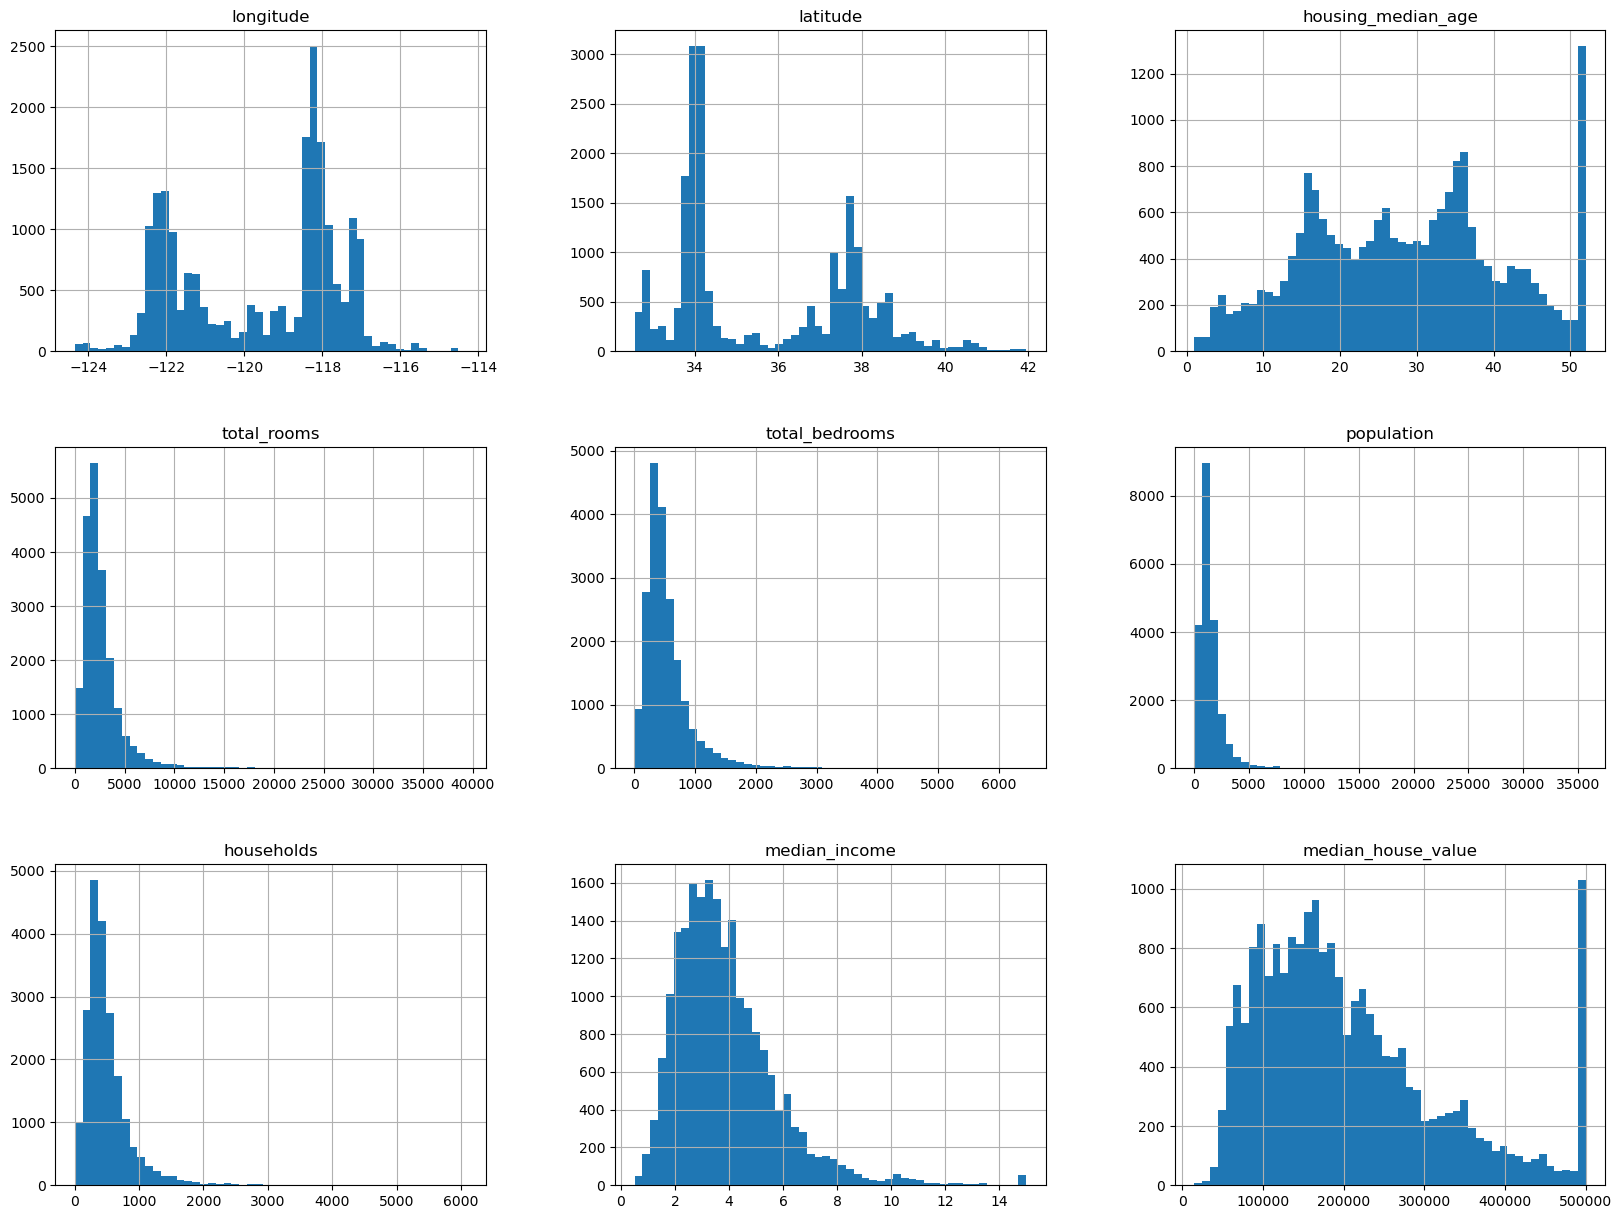

In [68]:
df_housing.hist(bins=50, figsize=(20, 15))

**Conclusões dos Histogramas:**
- O atributo alvo `median_house_value` parece ter um valor máximo limitado (capped) em $500.000.
- Atributos como `population` e `total_rooms` têm escalas muito maiores que os outros, indicando a necessidade de escalonamento.

## 3. Preparação dos Dados

Nesta fase, vamos dividir os dados em conjuntos de treino e teste, aprofundar a análise visual apenas no conjunto de treino e criar novas características para melhorar o desempenho do modelo.

### 3.1. Divisão Estratificada dos Dados

Para garantir uma avaliação honesta do nosso modelo, separamos 20% dos dados para um conjunto de teste que não será tocado até o final. Usamos a **amostragem estratificada** com base na renda (`median_income`), pois este é um atributo crucial para a previsão de preços. Isso garante que as proporções de cada faixa de renda sejam as mesmas nos conjuntos de treino e teste, evitando viés de amostragem.

In [69]:
# --- LINHA 1: Criar categorias de renda discretas ---
# O objetivo é converter o atributo contínuo 'median_income' em categorias discretas
# para poder usá-lo na amostragem estratificada.

df_housing["income_cat"] = np.ceil(  # 2. Arredonda o resultado para o próximo inteiro para cima (teto), criando categorias discretas (1.0, 2.0, 3.0, etc.).
    df_housing["median_income"] / 1.5  # 1. Divide a renda média por 1.5 para agrupar as faixas de renda e limitar o número de categorias totais.
)

# --- LINHA 2: Agrupar as categorias raras (altas rendas) ---
# Garante que não haja estratos (categorias) com poucas instâncias, o que prejudicaria a amostragem.
# Todas as categorias de renda mais altas (5 ou mais) são agrupadas em uma única categoria: 5.

df_housing["income_cat"] = df_housing["income_cat"].where(df_housing["income_cat"] < 5, 5.0) # CONDIÇÃO: Mantém o valor original se ele for MENOR que 5.
                                                                                            # VALOR DE SUBSTITUIÇÃO: Se a condição for falsa (ou seja, se o valor for 5 ou maior), o valor é substituído por 5.0.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


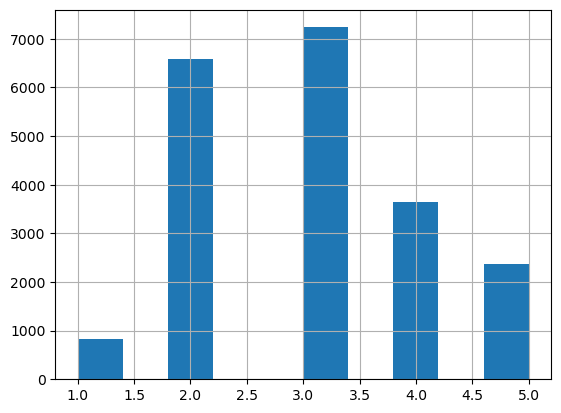

In [70]:
df_housing["income_cat"].hist()
df_housing.head()

In [71]:
# 1. Importa a classe StratifiedShuffleSplit da biblioteca Scikit-Learn.
#    Esta classe é projetada para dividir dados de forma estratificada e aleatória.
from sklearn.model_selection import StratifiedShuffleSplit

# 2. Cria uma instância do divisor estratificado, configurando suas regras.
split = StratifiedShuffleSplit(
    n_splits=1,        # Define que queremos gerar apenas 1 divisão (um par de treino/teste).
    test_size=0.2,     # Define que o conjunto de teste terá 20% do total de dados.
    random_state=42    # Garante que a divisão aleatória seja sempre a mesma.
)

# 3. Executa a divisão usando o método .split().
#    O loop é usado para extrair os arrays de índices de treino e teste gerados.
for train_index, test_index in split.split(df_housing, df_housing["income_cat"]):
    # O método .split() recebe:
    #   - df_housing: O DataFrame completo a ser dividido.
    #   - housing["income_cat"]: A coluna que será usada como base para a estratificação.
    # Ele retorna os índices das linhas para cada conjunto.

    # 4. Usa os índices gerados para criar os DataFrames de treino e teste.
    #    O método .loc[] seleciona as linhas do DataFrame original com base nos índices.
    strat_train_set = df_housing.loc[train_index]
    strat_test_set = df_housing.loc[test_index]

# Ao final, 'strat_train_set' contém 80% dos dados e 'strat_test_set' contém os 20% restantes,
# ambos com a mesma proporção de categorias de renda que o conjunto de dados original.

In [72]:
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set)) # O conjunto estratificado é consistente com o conjunto de treinamento.
strat_test_set.head() 

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4.0
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3.0
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3.0
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3.0


In [73]:
print(strat_train_set["income_cat"].value_counts() / len(strat_train_set))
strat_train_set.head()


income_cat
3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114462
1.0    0.039789
Name: count, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3.0


In [74]:
# Remove a coluna do conjunto de treino e atribui o resultado de volta à variável original
strat_train_set = strat_train_set.drop("income_cat", axis=1) # axis = 1 diz que iremos remover uma coluna. O seria uma linha

# Remove a coluna do conjunto de teste e atribui o resultado de volta à variável original
strat_test_set = strat_test_set.drop("income_cat", axis=1) # Deixaremos este dataset em standby.

### 3.2. Análise Geográfica

Agora, usando apenas o conjunto de treino, vamos explorar a relação entre a localização geográfica e os preços das casas.

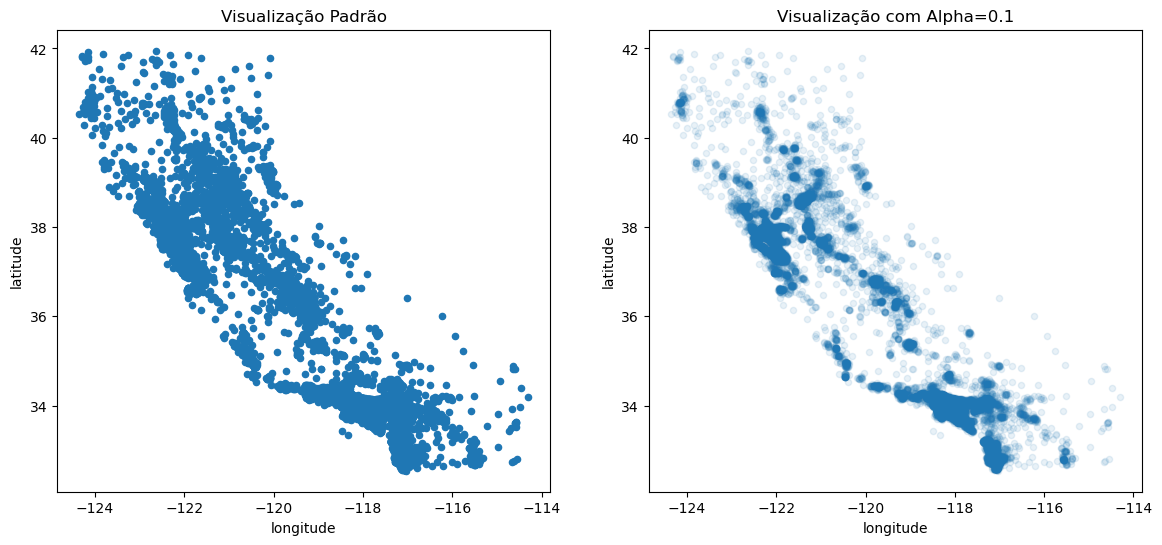

In [75]:
housing = strat_train_set.copy()

# 1. Cria uma figura e um conjunto de subplots
#    'fig' é a figura inteira, 'axes' é um array com os eixos [eixo_esquerdo, eixo_direito]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# 2. Plota o primeiro gráfico no primeiro eixo (axes[0])
housing.plot(kind="scatter", x="longitude", y="latitude", 
             ax=axes[0], title="Visualização Padrão")

# 3. Plota o segundo gráfico no segundo eixo (axes[1])
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, 
             ax=axes[1], title="Visualização com Alpha=0.1")
plt.show()

/var/folders/9g/j7mrlvls3lg9dq5js6vpp3c40000gn/T/ipykernel_6693/3320055688.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


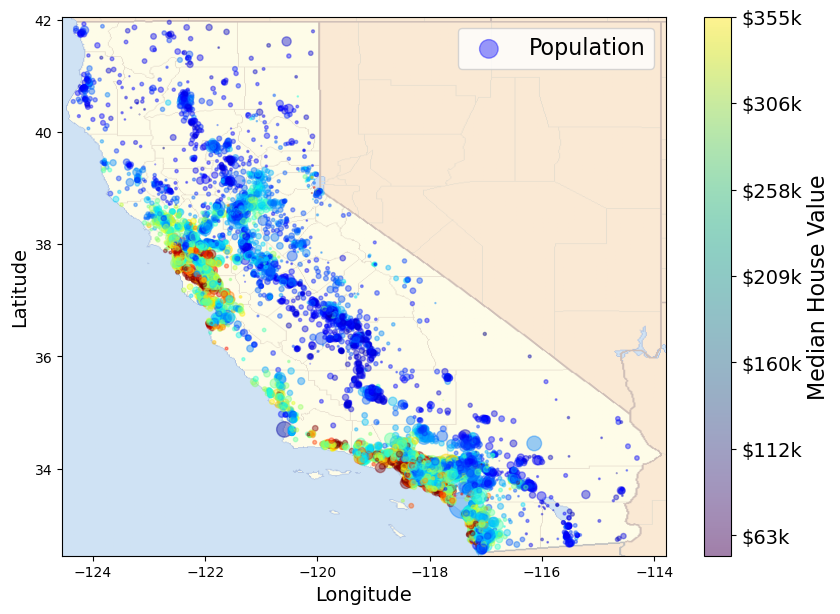

In [76]:
california_img = mpimg.imread("/Users/micarloteixeira/Desktop/Data Science/projects/Housing_predict - LinearRegression/images/california.png")

# 2. Cria o gráfico de dispersão (scatter plot) principal sobre os dados.
#    A variável 'ax' armazena o objeto 'Axes' do gráfico, permitindo sobrepor a imagem a ele.
ax = housing.plot(
    kind="scatter",               # Tipo de gráfico.
    x="longitude", y="latitude",  # Define os eixos x e y com as coordenadas.
    figsize=(10,7),               # Tamanho da figura.
    s=housing['population']/100,  # 's' (size): Tamanho dos pontos proporcional à população.
    label="Population",           # Rótulo para a legenda dos tamanhos.
    c="median_house_value",       # 'c' (color): Cor dos pontos baseada no preço médio da casa.
    cmap=plt.get_cmap("jet"),     # 'cmap': Mapa de cores (jet vai de azul-frio a vermelho-quente).
    colorbar=False,               # DESLIGA a barra de cores padrão, pois criaremos uma personalizada.
    alpha=0.4                     # Transparência dos pontos para ver a densidade.
)

# 3. Sobrepõe a imagem da Califórnia no gráfico de dispersão existente.
#    A imagem funcionará como um plano de fundo contextual.
plt.imshow(
    california_img,               # A imagem carregada.
    # 'extent': Define as coordenadas [x_min, x_max, y_min, y_max] onde a imagem será "esticada".
    # Estes valores precisam ser ajustados manualmente para alinhar o mapa com os pontos de dados.
    extent=[-124.55, -113.80, 32.45, 42.05],
    alpha=0.5                     # Transparência da imagem de fundo para que os pontos fiquem visíveis.
)

# 4. Define os rótulos dos eixos x e y.
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# 5. Criação e personalização da Barra de Cores (Colorbar).
prices = housing["median_house_value"] # Pega a série de preços para referência.
# Cria 11 valores igualmente espaçados entre o preço mínimo e máximo. Serão as posições dos "ticks".
tick_values = np.linspace(prices.min(), prices.max(), 11) 

# Adiciona a barra de cores ao gráfico.
cbar = plt.colorbar()

# Define os rótulos dos "ticks" na barra de cores de forma personalizada.
# Ex: Converte 120000 para "$120k".
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)

# Define o título principal da barra de cores.
cbar.set_label('Median House Value', fontsize=16)

# 6. Adiciona a legenda (para o tamanho da população) e exibe o gráfico final.
plt.legend(fontsize=16)
plt.show()

Conclusões da Análise Visual

A visualização geográfica sobreposta ao mapa da Califórnia revela um padrão claro: os preços dos imóveis (`median_house_value`, representados pela cor) são significativamente mais altos nas regiões costeiras e em áreas de alta densidade populacional (representadas pelo tamanho dos círculos), como Los Angeles e a Baía de São Francisco.

### 3.3 Buscando Correlações

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


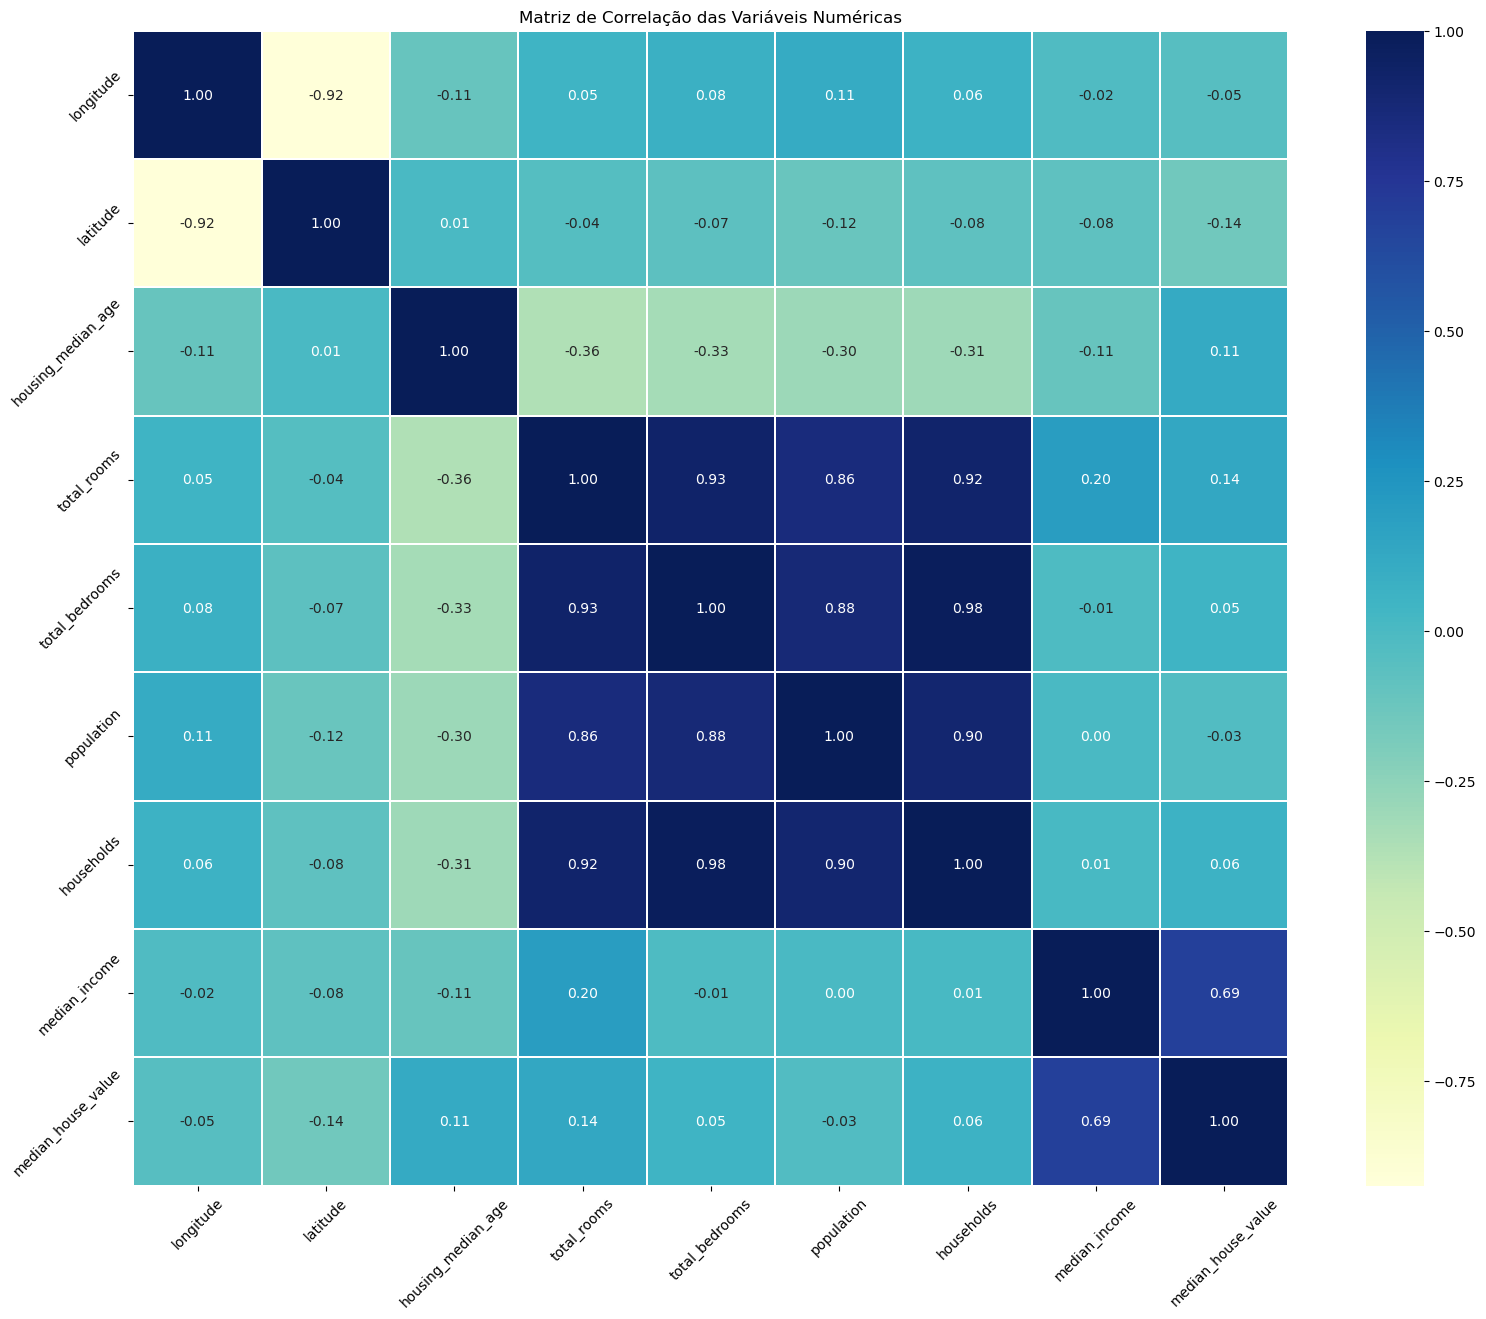

In [77]:
# 1. Calcula a matriz de correlação APENAS para as colunas numéricas.
#    - .select_dtypes(include=[np.number]) filtra o DataFrame para incluir apenas colunas com números.
#    - .corr() calcula a correlação de Pearson entre cada par de colunas numéricas.
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
print(corr_matrix["median_house_value"].sort_values(ascending = False))

# 2. Cria uma figura Matplotlib para desenhar o gráfico, definindo seu tamanho.
plt.figure(figsize=(20, 15)) # Aumentei um pouco o tamanho para melhor legibilidade das anotações

# 3. Desenha o mapa de calor (heatmap).
sns.heatmap(
    corr_matrix,      # Os dados a serem plotados (nossa matriz de correlação).
    annot=True,       # Exibe os valores numéricos de correlação em cada célula.
    cmap='YlGnBu',    # Define o mapa de cores: 'coolwarm' é ótimo para correlação (quente=positivo, frio=negativo).
    linewidths=.10,   # Isto faz com que as linhas entre as células sejam mais finas.
    cbar = True,      # Mostra a barra de cores.
    square=True,      # Garante que o gráfico e as células sejam quadrados para uma melhor estética.
    fmt=".2f"         # Formata os números da anotação para terem apenas duas casas decimais.
)
plt.title("Matriz de Correlação das Variáveis Numéricas", fontsize=12)
plt.xticks(rotation=45, fontsize=10) # Rotaciona as etiquetas para melhor legibilidade
plt.yticks(rotation=45, fontsize=10) # Rotaciona as etiquetas para melhor legibilidade
# 4. Exibe o gráfico gerado.
plt.show()

A matriz de correlação confirma numericamente o que vimos visualmente. O atributo `median_income` possui a correlação linear positiva mais forte com o preço das casas (aproximadamente 0.69).

<Axes: xlabel='median_income', ylabel='median_house_value'>

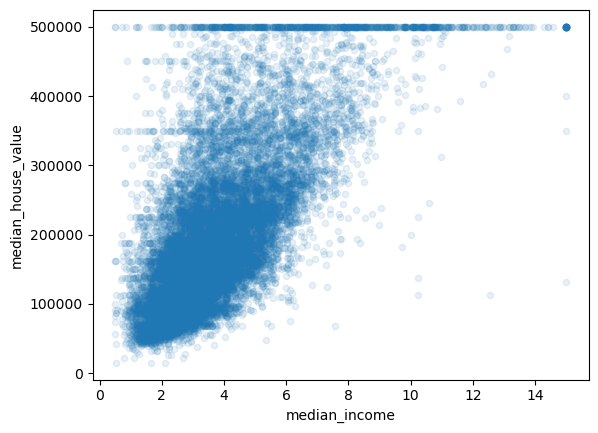

In [78]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

## 4. Pré-processamento Unificado para Modelagem

Nesta fase, construiremos um pipeline único e robusto que encapsula todas as etapas de preparação de dados: engenharia de atributos, tratamento de valores faltantes, codificação de categorias e escalonamento.

In [79]:
housing_previsores = strat_train_set.drop("median_house_value", axis=1) # Removendo o rótulo. Aqui queremos ajustar os previsores
housing_rotulo = strat_train_set["median_house_value"].copy() # Definindo o rótulo. Será o valor a ser previsto.

In [80]:
housing_previsores["rooms_per_household"] = housing_previsores["total_rooms"] / housing_previsores["households"]
housing_previsores["bedrooms_per_room"] = housing_previsores["total_bedrooms"] / housing_previsores["total_rooms"]
housing_previsores["population_per_household"] = housing_previsores["population"] / housing_previsores["households"]

### 4.1. Construção do Pipeline Completo

Para criar um fluxo de trabalho profissional e reutilizável, definimos um pipeline completo usando o `ColumnTransformer` do Scikit-Learn. Este pipeline irá:
1.  **Limpar os dados faltantes** (`SimpleImputer`).
2.  **Criar novos atributos** a partir dos existentes (com um transformador customizado `CombinedAttributesAdder`).
3.  **Escalar todos os atributos numéricos** (`StandardScaler`).
4.  **Codificar o atributo categórico** (`OneHotEncoder`).

Esta abordagem garante que as mesmas transformações, com os mesmos parâmetros aprendidos no conjunto de treino, sejam aplicadas de forma consistente a qualquer novo dado.

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Crie um DataFrame contendo apenas as colunas numéricas
housing_num = housing_previsores.drop("ocean_proximity", axis=1)

# 2. Crie o pipeline para os dados numéricos
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

# 3. Use o pipeline para preparar APENAS os dados numéricos
housing_num_tr = num_pipeline.fit_transform(housing_num)

# O resultado 'housing_num_tr' é um array NumPy com os dados numéricos processados.


In [82]:
from sklearn.preprocessing import OneHotEncoder

# 1. Seleciona a(s) coluna(s) categórica(s) do DataFrame de previsores.
#    Os colchetes duplos [['...']] garantem que 'housing_cat' seja um DataFrame,
#    que é o formato de entrada esperado pelo OneHotEncoder.
housing_cat = housing_previsores[['ocean_proximity']]

# 2. Cria uma instância do codificador OneHotEncoder.
cat_encoder = OneHotEncoder()

# 3. "Treina" o codificador e "transforma" os dados em um único passo.
#    - fit: O codificador aprende todas as categorias únicas existentes na coluna (ex: 'INLAND', 'NEAR BAY').
#    - transform: Ele cria uma nova coluna binária (0 ou 1) para cada categoria.
#    O resultado é uma matriz esparsa (SciPy sparse matrix), um formato eficiente para armazenar dados com muitos zeros.
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
#print(housing_cat_1hot)
#cat_encoder.categories_

In [83]:
import numpy as np

# A matriz categórica 'housing_cat_1hot' é esparsa. Para juntá-la com a matriz numérica,
# a maneira mais simples é convertê-la para um array NumPy denso (normal).
housing_cat_1hot_dense = housing_cat_1hot.toarray()

# Use np.hstack (horizontal stack) para juntar as colunas das duas matrizes
housing_prepared = np.hstack([housing_num_tr, housing_cat_1hot_dense])

print("Formato da matriz final preparada:", housing_prepared.shape)
print(housing_prepared)

Formato da matriz final preparada: (16512, 16)
[[-0.94135046  1.34743822  0.02756357 ...  0.          0.
   0.        ]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.          0.
   1.        ]
 [ 0.26758118 -0.1259716   1.22045984 ...  0.          0.
   0.        ]
 ...
 [-1.5707942   1.31001828  1.53856552 ...  0.          0.
   0.        ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.          0.
   0.        ]
 [-1.28105026  2.02567448 -0.13148926 ...  0.          0.
   0.        ]]


## 5. Treinamento e Otimização de Modelos

Com os dados preparados, agora podemos treinar, avaliar e otimizar diferentes modelos de regressão para encontrar o de melhor desempenho.

### Modelo Subajustado

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_prepared, housing_rotulo)

# Use o modelo treinado para prever os preços no conjunto de dados preparado
predictions = model.predict(housing_prepared)

# Vamos dar uma olhada nas 5 primeiras previsões e compará-las com os valores reais
print("Primeiras 5 previsões do modelo:", predictions[:5])
print("Primeiros 5 rótulos (valores reais):", housing_rotulo.iloc[:5].values) # Modelo subajustado

Primeiras 5 previsões do modelo: [ 83648.54287152 305815.0882093  150013.37994426 188096.42566946
 241840.13952577]
Primeiros 5 rótulos (valores reais): [ 72100. 279600.  82700. 112500. 238300.]


### Modelo Sobreajustado

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crie a instância do modelo
tree_reg = DecisionTreeRegressor(random_state=42) # Usamos random_state para reprodutibilidade

# Treine o modelo com os mesmos dados preparados e rótulos
tree_reg.fit(housing_prepared, housing_rotulo)

# --- Agora, vamos avaliar este novo modelo NO MESMO CONJUNTO DE TREINO ---
tree_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_rotulo, tree_predictions)
tree_rmse = np.sqrt(tree_mse)

print(f"O RMSE do modelo de Árvore de Decisão no conjunto de treino é: ${tree_rmse:,.2f}") #Modelo sobreajustado

O RMSE do modelo de Árvore de Decisão no conjunto de treino é: $0.00


### Outro Modelo Sobreajustado

In [86]:
from sklearn.model_selection import cross_val_score

# Executa a validação cruzada K-fold (com K=10)
# scoring="neg_mean_squared_error" é usado porque o Scikit-Learn espera uma função de utilidade (maior é melhor)
scores = cross_val_score(tree_reg, housing_prepared, housing_rotulo,
                         scoring="neg_mean_squared_error", cv=10)

# O resultado são 10 scores de erro (negativos). Precisamos torná-los positivos e tirar a raiz quadrada.
tree_rmse_scores = np.sqrt(-scores)

# Vamos criar uma função para exibir os scores de forma organizada
def display_scores(scores):
    print("Scores:", scores)
    print("Média:", scores.mean())
    print("Desvio Padrão:", scores.std())

print("Scores de Validação Cruzada para a Árvore de Decisão:")
display_scores(tree_rmse_scores)

Scores de Validação Cruzada para a Árvore de Decisão:
Scores: [71918.58642103 71384.84501617 68633.80280963 69659.52488314
 67941.65145966 75921.07007104 71837.53328882 72468.1641427
 68601.96049537 68323.32006781]
Média: 70669.045865536
Desvio Padrão: 2379.810209113841


In [87]:
from sklearn.ensemble import RandomForestRegressor

# Crie a instância do modelo de Floresta Aleatória
forest_reg = RandomForestRegressor(random_state=42)

# Vamos direto para a validação cruzada para ter uma avaliação robusta
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_rotulo,
                                scoring="neg_mean_squared_error", cv=10)

# Converte os scores para RMSE
forest_rmse_scores = np.sqrt(-forest_scores)

print("Scores de Validação Cruzada para a Floresta Aleatória:")
display_scores(forest_rmse_scores)

Scores de Validação Cruzada para a Floresta Aleatória:
Scores: [51468.67431659 48558.10945101 46944.27789502 51886.63016622
 47662.87497687 51383.51857789 52459.08101362 50123.08324218
 48713.72491549 54195.07949047]
Média: 50339.50540453655
Desvio Padrão: 2206.1714766286996


### 5.1. Comparação de Modelos

Foram avaliados três modelos usando validação cruzada:
* **Regressão Linear:** Serviu como linha de base, mas apresentou um RMSE alto (~$68k), indicando subajuste (underfitting).
* **Árvore de Decisão:** Mostrou-se muito instável, com sobreajuste (overfitting) severo e um RMSE de ~$70k na validação cruzada.
* **Floresta Aleatória (Random Forest):** Apresentou o melhor desempenho, com um RMSE de ~$50k, sendo escolhido como o modelo mais promissor.

### Ajustando os Hiperparâmetros do Melhor Modelo Testado - Grid Search


In [88]:
from sklearn.model_selection import GridSearchCV

# Define a grade de parâmetros que queremos testar
param_grid = [
    # Testa 9 combinações de n_estimators e max_features
    {'n_estimators': [10, 30, 50], 'max_features': [6, 8, 10]},
    # Em seguida, testa mais 6 combinações com bootstrap=False
    {'bootstrap': [False], 'n_estimators': [5, 10], 'max_features': [3, 4, 5]},
]

# Cria a instância do modelo
forest_reg = RandomForestRegressor(random_state=42)

# Cria a instância do Grid Search
# cv=5 significa que usaremos validação cruzada de 5 folds
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [89]:
# Treina o Grid Search. Ele vai testar todas as combinações
grid_search.fit(housing_prepared, housing_rotulo)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"[{'max_features': [6, 8, ...], 'n_estimators': [10, 30, ...]}, {'bootstrap': [False], 'max_features': [3, 4, ...], 'n_estimators': [5, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,50


### 5.2. Otimização do Melhor Modelo

O `GridSearchCV` foi utilizado para ajustar os hiperparâmetros do `RandomForestRegressor`. A busca encontrou a configuração ótima que melhorou ligeiramente o desempenho do modelo, alcançando um RMSE de validação de **~$49.5k**.

In [90]:
# Exibe a melhor combinação de parâmetros encontrada
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Exibe o melhor estimador (o modelo já treinado com os melhores parâmetros)
# print("Melhor estimador:", grid_search.best_estimator_)

# Vamos ver os scores de cada combinação testada
cv_results = grid_search.cv_results_
print("\nScores de cada combinação testada (RMSE):")
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(np.sqrt(-mean_score), params)

Melhores parâmetros encontrados: {'max_features': 6, 'n_estimators': 50}

Scores de cada combinação testada (RMSE):
51766.98839356613 {'max_features': 6, 'n_estimators': 10}
49882.96011935094 {'max_features': 6, 'n_estimators': 30}
49489.87239376749 {'max_features': 6, 'n_estimators': 50}
52040.865576692486 {'max_features': 8, 'n_estimators': 10}
49985.97352309603 {'max_features': 8, 'n_estimators': 30}
49635.484587321385 {'max_features': 8, 'n_estimators': 50}
52651.159203193594 {'max_features': 10, 'n_estimators': 10}
50483.245250652406 {'max_features': 10, 'n_estimators': 30}
49925.85114351943 {'max_features': 10, 'n_estimators': 50}
54168.32198752716 {'bootstrap': False, 'max_features': 3, 'n_estimators': 5}
51810.53293480496 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
54563.03858956114 {'bootstrap': False, 'max_features': 4, 'n_estimators': 5}
51565.74917308791 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
54120.591462218275 {'bootstrap': False, 'max_

## 6. Avaliação Final no Conjunto de Teste

Chegamos à etapa final do projeto. Agora, vamos pegar nosso melhor modelo, que foi otimizado pelo `GridSearchCV`, e avaliá-lo no conjunto de teste (`strat_test_set`).

Este conjunto foi mantido separado durante todo o processo e nunca foi visto pelo modelo ou pelos pipelines durante o treinamento. Portanto, o resultado obtido aqui será a estimativa mais realista do desempenho do modelo em dados novos.

O processo seguirá os seguintes passos:
1.  Obter o melhor modelo do `Grid Search`.
2.  Separar os previsores e rótulos do conjunto de teste.
3.  Aplicar **exatamente as mesmas transformações** de pré-processamento que foram aplicadas ao conjunto de treino, usando os objetos já "treinados" (`num_pipeline` e `cat_encoder`).
4.  Fazer as previsões e calcular o RMSE final.

In [ ]:
# 1. Obtenha o melhor modelo (esta parte está correta)
final_model = grid_search.best_estimator_

# 2. Separe previsores e rótulos do CONJUNTO DE TESTE 
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# ===================================================================
# 3. APLIQUE AS MESMAS TRANSFORMAÇÕES SEPARADAMENTE 
# ===================================================================

# 3a. Processa as colunas numéricas do X_test com o 'num_pipeline' JÁ TREINADO
X_test["rooms_per_household"] = X_test["total_rooms"] / X_test["households"]
X_test["bedrooms_per_room"] = X_test["total_bedrooms"] / X_test["total_rooms"]
X_test["population_per_household"] = X_test["population"] / X_test["households"]
X_test_num = X_test.drop("ocean_proximity", axis=1)
X_test_num_tr = num_pipeline.transform(X_test_num) # Use apenas .transform()

# 3b. Processe a coluna categórica do X_test com o 'cat_encoder' JÁ TREINADO
X_test_cat = X_test[['ocean_proximity']]
X_test_cat_1hot = cat_encoder.transform(X_test_cat) # Use apenas .transform()! 

# 3c. Junte os resultados em uma única matriz preparada
X_test_prepared = np.hstack([X_test_num_tr, X_test_cat_1hot.toarray()])


# 4. Faça as previsões (esta parte está correta)
final_predictions = final_model.predict(X_test_prepared)


# 5. Calcule o RMSE final (esta parte está correta)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"O RMSE final no conjunto de teste é: ${final_rmse:,.2f}")

O RMSE final no conjunto de teste é: $46,885.11


### 6.1. Resultado Final
O modelo final otimizado, quando avaliado no conjunto de teste, alcançou um **RMSE de $46,885.11**.

Este valor representa a estimativa final do erro de previsão típico do modelo. Ele indica que, em média, as previsões de preço do modelo tendem a desviar-se do valor real por aproximadamente $46,885.11. O desempenho no teste foi consistente (e até ligeiramente melhor) do que o estimado durante a validação cruzada, o que valida a robustez do nosso modelo.